In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,root_mean_squared_error
from sklearn.metrics import recall_score,accuracy_score,precision_score,f1_score
from sklearn import neighbors
from sklearn import cluster
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Task 1

In [3]:
# Read the File
Project_file=pd.read_csv("DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv",sep=";")
Project_file

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


# DATA EXPLORATION

In [5]:
# Storing the data into another variable
df=Project_file
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [6]:
Project_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [7]:
Project_file.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [8]:
Project_file.shape

(740, 21)

In [9]:
Project_file.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


# DATA PREPROCESSING

In [11]:
Project_file.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [12]:
df["Disciplinary failure"].value_counts()

Disciplinary failure
0    700
1     40
Name: count, dtype: int64

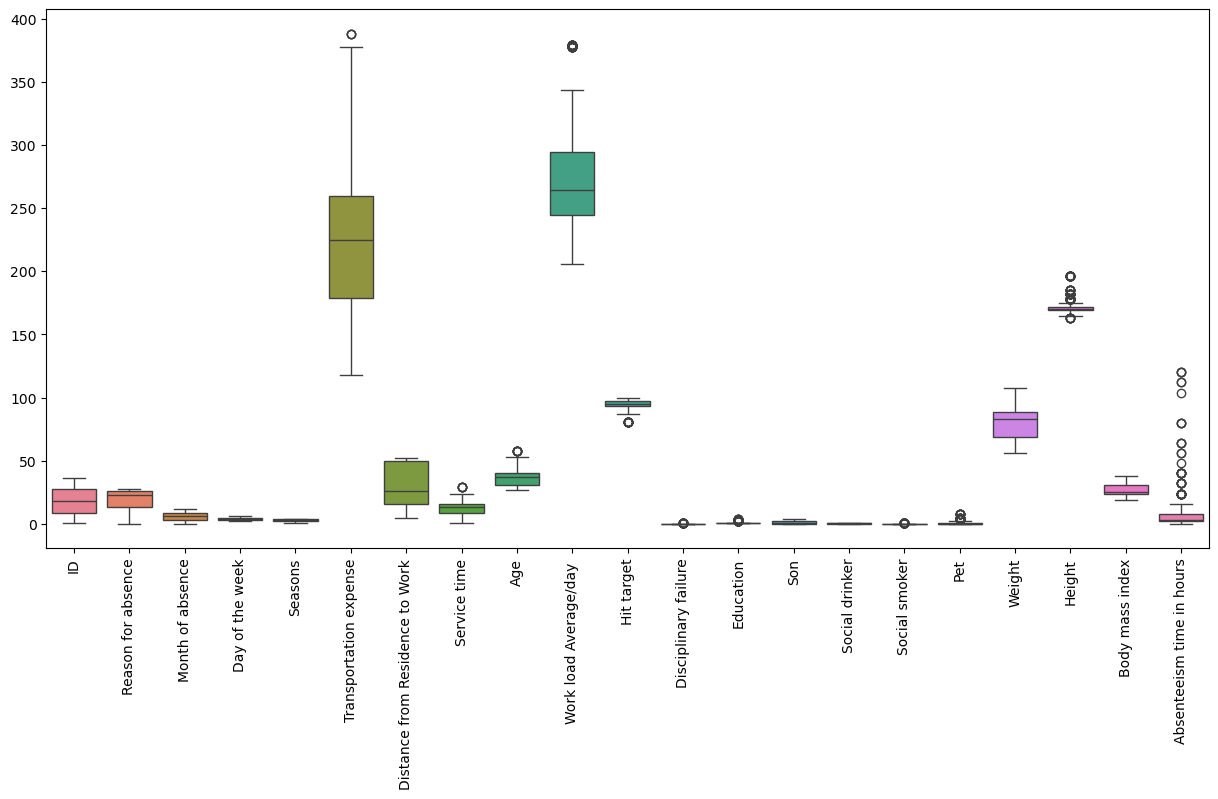

In [13]:
sns.boxplot(data=Project_file)
plt.gcf().set_size_inches(15,7)
plt.xticks(rotation=90)
plt.show()

In [14]:
data=[]
for col in Project_file:
    lo=[]
    uo=[]
    column_df=pd.Series(Project_file[col])
    Max=max(column_df)
    Min=min(column_df)
    Range=Max-Min
    Q1=column_df.quantile(0.25)
    Q2=column_df.quantile(0.50)
    Q3=column_df.quantile(0.75)
    IQR=Q3-Q1
    UF=Q3+1.5*IQR
    LF=Q1-1.5*IQR
    for z in Project_file[col]:
        if z>UF:
            uo.append(z)
        elif z<LF:
            lo.append(z)
    data.append((col,Max,Min,Range,Q1,Q2,Q3,IQR,UF,LF,[lo,uo]))
columns_series=["Columns","Maximum","Minimum","Range","Q1","Q2","Q3","IQR","UF","LF","Outliers"]
datas=pd.DataFrame(data,columns=columns_series)
datas

,Columns,Maximum,Minimum,Range,Q1,Q2,Q3,IQR,UF,LF,Outliers
0,ID,36.000,1.000,35.000,9.000,18.000,28.000,19.00,56.500,-19.500,"[[], []]"
1,Reason for absence,28.000,0.000,28.000,13.000,23.000,26.000,13.00,45.500,-6.500,"[[], []]"
2,Month of absence,12.000,0.000,12.000,3.000,6.000,9.000,6.00,18.000,-6.000,"[[], []]"
3,Day of the week,6.000,2.000,4.000,3.000,4.000,5.000,2.00,8.000,0.000,"[[], []]"
4,Seasons,4.000,1.000,3.000,2.000,3.000,4.000,2.00,7.000,-1.000,"[[], []]"
5,Transportation expense,388.000,118.000,270.000,179.000,225.000,260.000,81.00,381.500,57.500,"[[], [388, 388, 388]]"
6,Distance from Residence to Work,52.000,5.000,47.000,16.000,26.000,50.000,34.00,101.000,-35.000,"[[], []]"
7,Service time,29.000,1.000,28.000,9.000,13.000,16.000,7.00,26.500,-1.500,"[[], [29, 29, 29, 29, 29]]"
8,Age,58.000,27.000,31.000,31.000,37.000,40.000,9.00,53.500,17.500,"[[], [58, 58, 58, 58, 58, 58, 58, 58]]"
9,Work load Average/day,378.884,205.917,172.967,244.387,264.249,294.217,49.83,368.962,169.642,"[[], [378.884, 378.884, 378.884, 378.884, 378...."


In [15]:
column_to_treat=["Transportation expense","Service time","Absenteeism time in hours","Height","Hit target","Age","Work load Average/day "]

In [16]:
threshold=[14,17,21]
bins=["group1","group2","group3","group4"]
def assign_reason(val):
    if val<=threshold[0]:
        return bins[0]
    elif val<=threshold[1]:
        return bins[1]
    elif val<=threshold[2]:
        return bins[2]
    else:
        return bins[3]
df["Reason_For_Absence_c"]=df["Reason for absence"].apply(assign_reason)

In [17]:
bins=[0,1,2,3,4,5,6,7]
labels=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
df['Day_of_the_week_c']=pd.cut(df['Day of the week'],bins=bins,labels=labels)

In [18]:
bins=[0,1,2,3,4]
labels=["Summer","Winter","Autumn","Spring"]
df["Seasons_c"]=pd.cut(df["Seasons"],bins=bins,labels=labels)

In [19]:
Threshold=[30,35,40,45,50,55]
bins=["25 TO 30","30 TO 35","35 TO 40","40 TO 45","45 TO 50","50 TO 55","55 TO 60"]
def assign_value(val):
    if val<=Threshold[0]:
        return bins[0]
    elif val<=Threshold[1]:
        return bins[1]
    elif val<=Threshold[2]:
        return bins[2]
    elif val<=Threshold[3]:
        return bins[3]
    elif val<=Threshold[4]:
        return bins[4]
    elif val<=Threshold[5]:
        return bins[5]
    else:
        return bins[6]
df["Age_c"]=df["Age"].apply(assign_value)

In [20]:
df["Hit_target_c"]=np.where(df["Hit target"]>df["Hit target"].median(),"not reached","reached")

In [21]:
bins=[-1,0,1]
labels=["no disciplinary action","action take"]
df["Disciplinary failure_c"]=pd.cut(df["Disciplinary failure"],bins=bins,labels=labels)

In [22]:
bins=[0,1,2,3,4]
labels=["High school","Graduate","Post Graduate","Doctor/Masters"]
df["Education_c"]=pd.cut(df["Education"],bins=bins,labels=labels)

In [23]:
bins=[-1,0,1]
labels=["has son","no son"]
df["son_c"]=pd.cut(df["Son"],bins=bins,labels=labels)

In [24]:
bins=[-1,0,1]
labels=["not a drinker","social drinker"]
df["Social_drinker_c"]=pd.cut(df["Social drinker"],bins=bins,labels=labels)

In [25]:
bins=[-1,0,1]
labels=["not a smoker","smoker"]
df["social_smoker_c"]=pd.cut(df["Social smoker"],bins=bins,labels=labels)

In [26]:
bins=[-1,0,1]
labels=["has pet","no pet"]
df["Pet_c"]=pd.cut(df["Pet"],bins=bins,labels=labels)

In [27]:
df["Absenteeism time in hours_c"]=np.where(df["Absenteeism time in hours"]>df["Absenteeism time in hours"].mean(),"high_absent","low_absent")

# TASK 2

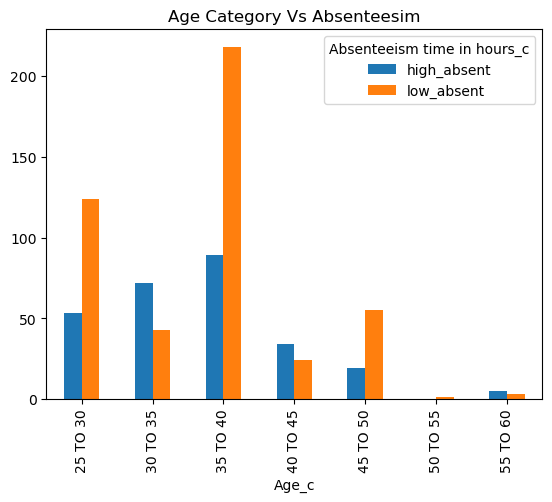

In [29]:
pd.crosstab(df["Age_c"],df["Absenteeism time in hours_c"]).plot(kind="bar")
plt.title("Age Category Vs Absenteesim")
plt.show()

Text(0.5, 1.0, 'Son Category  Vs Absenteesu')

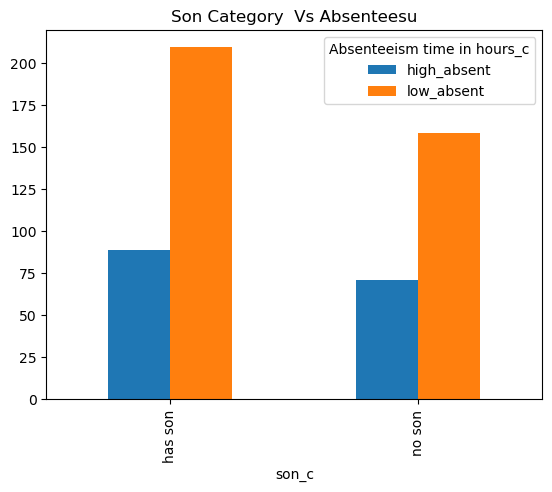

In [30]:
pd.crosstab(df["son_c"],df["Absenteeism time in hours_c"]).plot(kind="bar")
plt.title("Son Category  Vs Absenteesu")

<Axes: xlabel='Reason_For_Absence_c'>

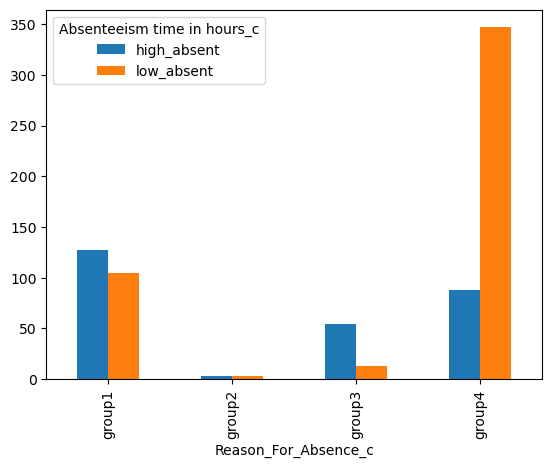

In [31]:
pd.crosstab(df["Reason_For_Absence_c"],df["Absenteeism time in hours_c"]).plot(kind="bar")

<Axes: xlabel='Hit_target_c'>

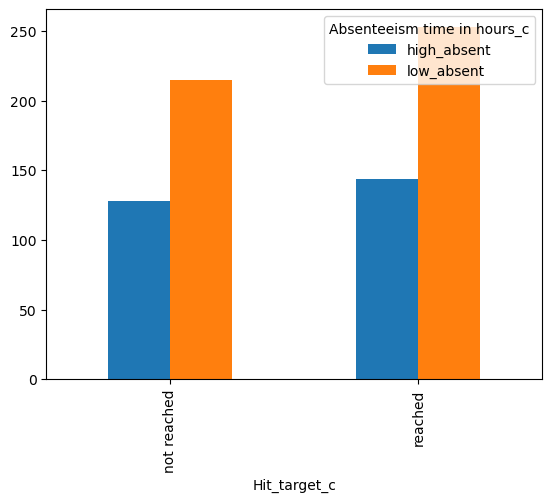

In [32]:
pd.crosstab(df["Hit_target_c"],df["Absenteeism time in hours_c"]).plot(kind="bar")

In [33]:
df["Disciplinary failure_c"].value_counts()

Disciplinary failure_c
no disciplinary action    700
action take                40
Name: count, dtype: int64

<Axes: xlabel='Disciplinary failure_c'>

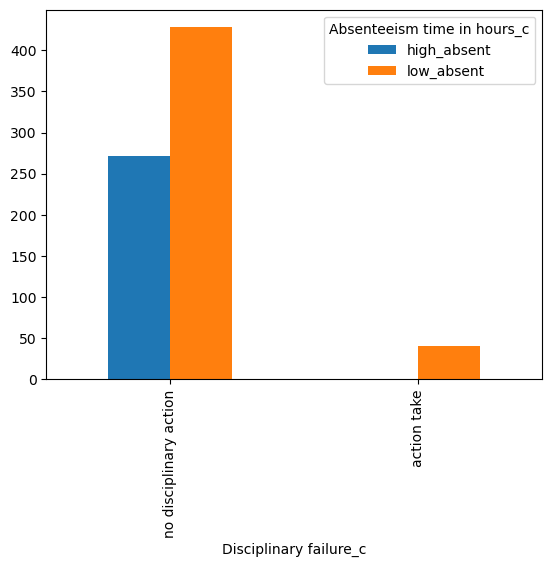

In [34]:
pd.crosstab(df["Disciplinary failure_c"],df["Absenteeism time in hours_c"]).plot(kind="bar")

In [35]:
df["Education_c"].value_counts()

Education_c
High school       611
Post Graduate      79
Graduate           46
Doctor/Masters      4
Name: count, dtype: int64

<Axes: xlabel='Education_c'>

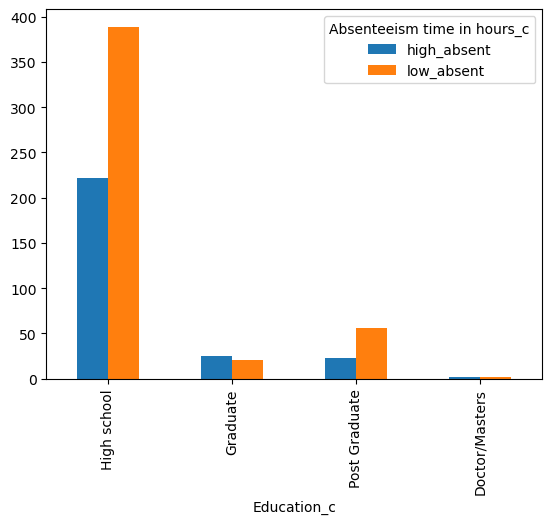

In [36]:
pd.crosstab(df["Education_c"],df["Absenteeism time in hours_c"]).plot(kind="bar")

# TASK 3

In [84]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Reason_For_Absence_c',
       'Day_of_the_week_c', 'Seasons_c', 'Age_c', 'Hit_target_c',
       'Disciplinary failure_c', 'Education_c', 'son_c', 'Social_drinker_c',
       'social_smoker_c', 'Pet_c', 'Absenteeism time in hours_c'],
      dtype='object')

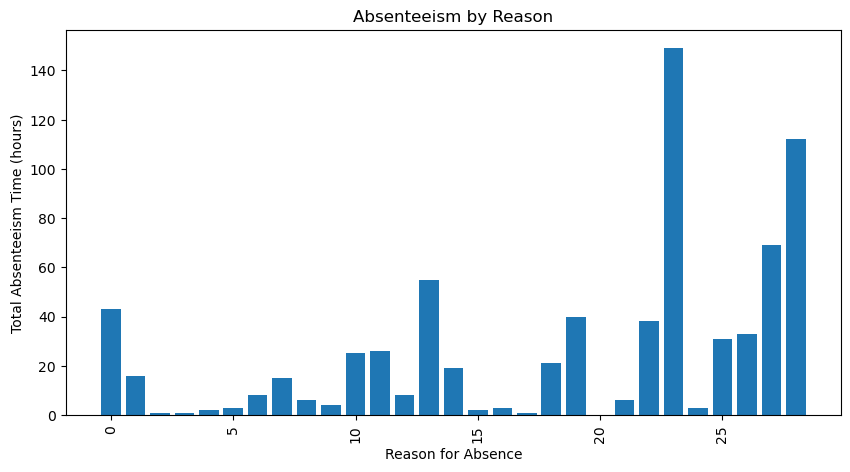

In [86]:
import matplotlib.pyplot as plt
df_grouped = df.groupby(["Reason for absence"])["Absenteeism time in hours"].count()
plt.figure(figsize=(10,5))
plt.bar(df_grouped.index, df_grouped.values)
plt.xlabel("Reason for Absence")
plt.ylabel("Total Absenteeism Time (hours)")
plt.title("Absenteeism by Reason")
plt.xticks(rotation=90)
plt.show()

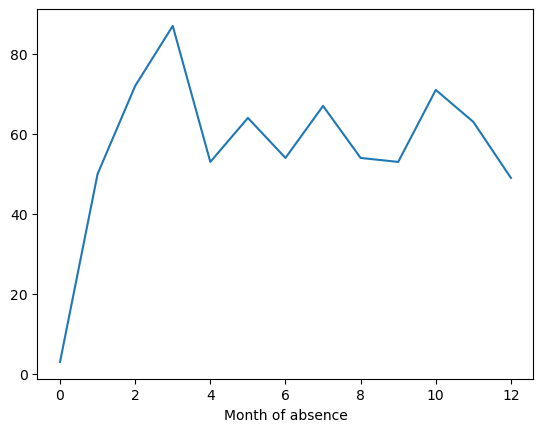

In [87]:
df_grouped = df.groupby(["Month of absence"])["Reason for absence"].count().plot(kind="line")

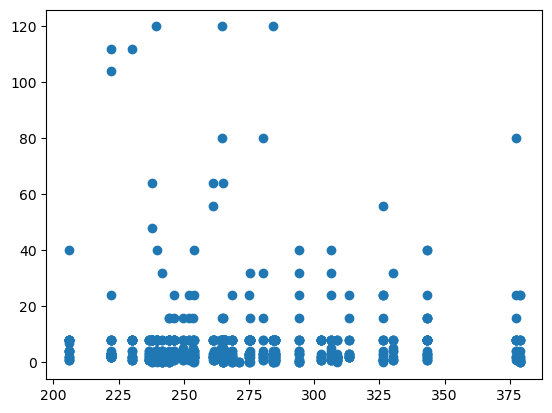

In [88]:
plt.scatter(df["Work load Average/day "],df["Absenteeism time in hours"])
plt.show()

# TASK 4

In [93]:
Num_col=Project_file.select_dtypes(exclude=["object","category"])
Num_col

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [95]:
corr=abs(Num_col>=0.7)
corr

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,True,True,True,True,True,True,True,True,True,True,...,False,True,True,True,False,True,True,True,True,True
1,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,False,False,True,True,True,False
2,True,True,True,True,True,True,True,True,True,True,...,False,True,False,True,False,False,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,False,True,True,True,True,False,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,False,True,True,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,True,True,True,True,True,True,True,True,True,True,...,False,True,True,True,False,True,True,True,True,True
736,True,True,True,True,True,True,True,True,True,True,...,False,True,True,False,False,True,True,True,True,True
737,True,False,False,True,True,True,True,True,True,True,...,False,True,True,True,False,True,True,True,True,False
738,True,False,False,True,True,True,True,True,True,True,...,False,True,True,True,False,True,True,True,True,False


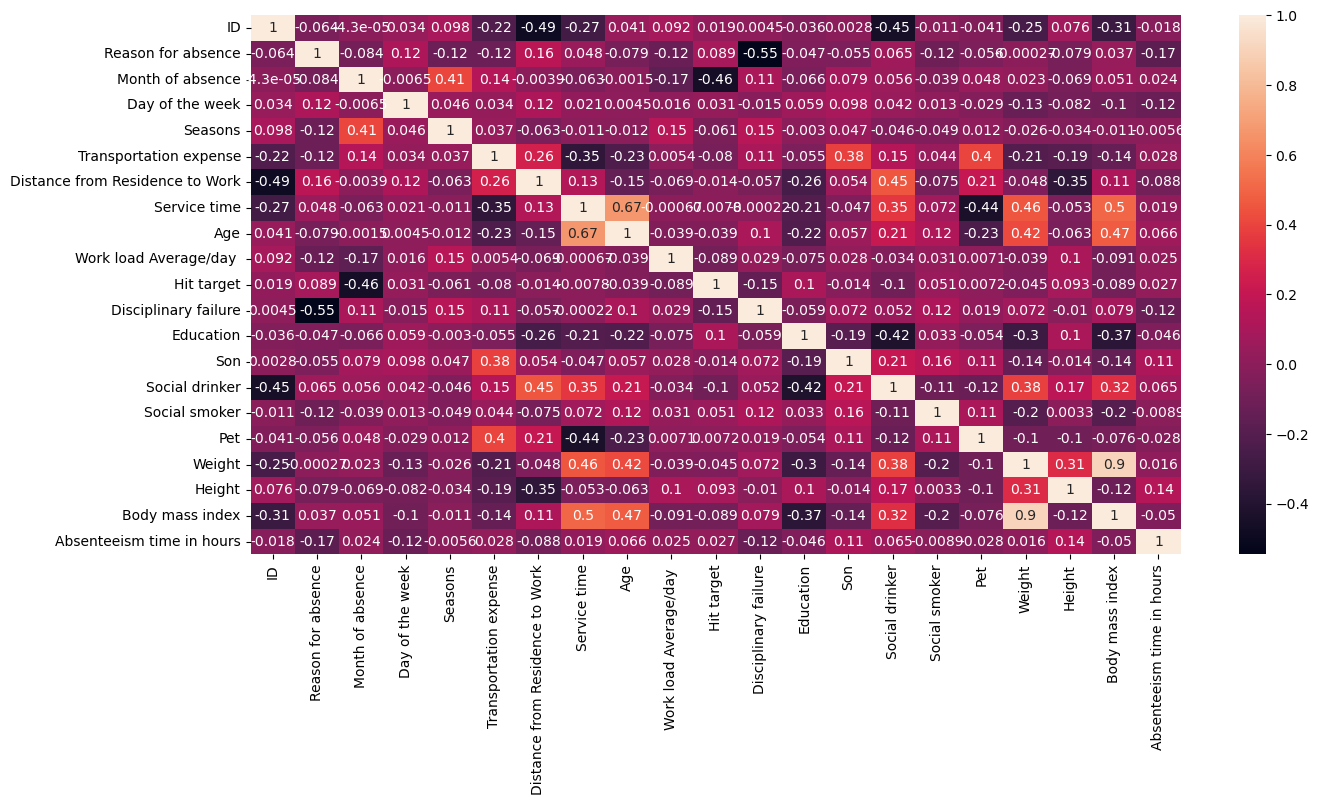

In [97]:
sns.heatmap(Num_col.corr(),annot=True)
plt.gcf().set_size_inches(15,7)

In [98]:
scale=StandardScaler()
df_scaled=scale.fit_transform(Num_col)
df_scaled=pd.DataFrame(df_scaled,columns=Num_col.columns)
df_scaled

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,-0.637161,0.804938,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,-0.219511
1,1.632719,-2.280124,0.196763,-0.643947,-1.390175,-1.544379,-1.121694,1.242825,2.092860,-0.818212,...,4.183300,-0.433857,-0.017234,0.872872,-0.280566,-0.566240,1.473056,0.975828,1.009438,-0.519767
2,-1.363523,0.448970,0.196763,0.059924,-1.390175,-0.632665,1.441240,1.242825,0.239405,-0.818212,...,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.566240,0.774000,-0.350671,1.009438,-0.369639
3,-1.000342,-1.449530,0.196763,0.763796,-1.390175,0.861947,-1.661258,0.329981,0.393859,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,3.564226,-0.566240,-0.857131,-0.682295,-0.625100,-0.219511
4,-0.637161,0.448970,0.196763,0.763796,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,-0.369639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,-0.637161,-0.618937,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.176427,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,0.080744
736,-1.545113,-0.974905,0.196763,-0.643947,-1.390175,0.204318,-1.256585,0.329981,0.084950,-0.176427,...,-0.239046,2.538869,-0.017234,-1.145644,-0.280566,0.192850,0.696327,-0.019046,0.542427,-0.219511
737,-1.272728,-2.280124,-1.841698,-0.643947,-1.390175,-1.544379,-1.054248,0.101770,0.548314,-0.006949,...,-0.239046,-0.433857,-0.017234,0.872872,-0.280566,5.506478,1.473056,-0.350671,1.709954,-0.519767
738,-0.909547,-2.280124,-1.841698,0.059924,-0.490149,0.144533,0.362110,0.329981,0.393859,-0.006949,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.951940,1.628402,-0.350671,1.943459,-0.519767


In [99]:
selected1=df_scaled.loc[:,["Absenteeism time in hours","Reason for absence"]]
selected1

,Absenteeism time in hours,Reason for absence
0,-0.219511,0.804938
1,-0.519767,-2.280124
2,-0.369639,0.448970
3,-0.219511,-1.449530
4,-0.369639,0.448970
...,...,...
735,0.080744,-0.618937
736,-0.219511,-0.974905
737,-0.519767,-2.280124
738,-0.519767,-2.280124


# 1ST MODEL

In [101]:
X=np.array(selected1["Reason for absence"]).reshape(-1,1)
X

array([[ 0.80493838],
       [-2.28012426],
       [ 0.44896961],
       [-1.44953047],
       [ 0.44896961],
       [ 0.44896961],
       [ 0.33031336],
       [ 0.44896961],
       [-0.02565541],
       [ 0.33031336],
       [-2.161468  ],
       [-2.161468  ],
       [-0.97490545],
       [-0.97490545],
       [ 0.44896961],
       [-0.61893668],
       [ 0.44896961],
       [ 0.2116571 ],
       [-0.97490545],
       [ 0.44896961],
       [-1.0935617 ],
       [-0.97490545],
       [-0.73759294],
       [ 1.04225089],
       [-0.14431166],
       [ 0.68628213],
       [ 0.44896961],
       [ 1.04225089],
       [-0.14431166],
       [ 0.44896961],
       [-0.14431166],
       [-0.14431166],
       [ 0.44896961],
       [-0.14431166],
       [ 0.44896961],
       [ 0.44896961],
       [ 0.56762587],
       [-0.97490545],
       [ 1.04225089],
       [ 0.44896961],
       [ 0.44896961],
       [ 0.44896961],
       [ 0.44896961],
       [-0.02565541],
       [ 0.44896961],
       [ 0

In [102]:
y=np.array(selected1["Absenteeism time in hours"])
y

array([-2.19511113e-01, -5.19766608e-01, -3.69638860e-01, -2.19511113e-01,
       -3.69638860e-01, -3.69638860e-01,  8.07443833e-02, -2.19511113e-01,
        2.48278835e+00,  8.07443833e-02,  8.07443833e-02,  8.07443833e-02,
        8.07443833e-02, -4.44702734e-01, -2.19511113e-01,  8.07443833e-02,
       -3.69638860e-01,  8.07443833e-02,  8.07443833e-02, -3.69638860e-01,
        8.07443833e-02, -4.44702734e-01,  2.48278835e+00, -2.19511113e-01,
        8.07443833e-02,  5.68050938e-03, -4.44702734e-01, -2.19511113e-01,
        8.07443833e-02, -3.69638860e-01,  8.07443833e-02,  8.07443833e-02,
       -2.19511113e-01,  8.07443833e-02, -3.69638860e-01, -4.44702734e-01,
        8.07443833e-02, -2.19511113e-01,  8.07443833e-02, -2.19511113e-01,
       -3.69638860e-01, -2.19511113e-01, -2.19511113e-01,  8.07443833e-02,
       -3.69638860e-01, -2.94574986e-01, -2.94574986e-01, -2.19511113e-01,
        8.07443833e-02,  1.88227736e+00, -5.19766608e-01, -5.19766608e-01,
       -3.69638860e-01, -

In [103]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X,y,test_size=0.3,random_state=200)

In [104]:
s1_model=LinearRegression().fit(X1_train,y1_train)
s1_model

LinearRegression()

In [105]:
print("Intercept:",s1_model.intercept_)
print("Slope:",s1_model.coef_)

Intercept: 0.0038087254909634502
Slope: [-0.19747589]


In [106]:
y1_pred=s1_model.predict(X1_test)
y1_pred

array([ 0.4540783 ,  0.33691955, -0.08485195,  0.4540783 ,  0.14946555,
       -0.17857895, -0.2020107 , -0.03798845, -0.1551472 ,  0.14946555,
        0.4540783 ,  0.29005605,  0.14946555,  0.4540783 , -0.2020107 ,
       -0.17857895,  0.00887505,  0.1728973 , -0.17857895, -0.08485195,
       -0.2020107 ,  0.2197608 , -0.1551472 ,  0.2197608 , -0.08485195,
        0.4540783 , -0.08485195, -0.1551472 , -0.2020107 , -0.08485195,
       -0.17857895,  0.0323068 ,  0.14946555,  0.0323068 , -0.08485195,
       -0.0614202 ,  0.0323068 ,  0.14946555, -0.08485195,  0.29005605,
        0.1260338 , -0.2020107 ,  0.2197608 ,  0.1260338 ,  0.00887505,
       -0.08485195,  0.14946555, -0.1551472 , -0.2020107 , -0.08485195,
       -0.2020107 , -0.17857895,  0.4540783 ,  0.2197608 ,  0.4540783 ,
       -0.1551472 ,  0.19632905,  0.4540783 ,  0.00887505,  0.0323068 ,
       -0.13171545, -0.2020107 ,  0.2197608 , -0.17857895, -0.2020107 ,
       -0.08485195, -0.2020107 ,  0.00887505, -0.2020107 ,  0.14

In [107]:
MSE1=mean_squared_error(y1_test,y1_pred)
print("MSE",MSE1)
MAE1=mean_absolute_error(y1_test,y1_pred)
print("MAE",MAE1)
RMSE1=root_mean_squared_error(y1_test,y1_pred)
print("RMSE",RMSE1)
R2_SCORE1=r2_score(y1_test,y1_pred)
print("R2_SCORE:",R2_SCORE1)

MSE 0.9017211871787671
MAE 0.44923248904232144
RMSE 0.9495900100457919
R2_SCORE: 0.008304217032900296


# 2ND MODEL

In [115]:
X2=np.array(df_scaled[["Reason for absence","Disciplinary failure"]]).reshape(-1,2)
y2=np.array(df_scaled["Absenteeism time in hours"])

In [120]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=200)

In [122]:
s2_model=LinearRegression().fit(X2_train,y2_train)
s2_model

LinearRegression()

In [125]:
print("Intercept:",s2_model.intercept_)
print("Slope:",s2_model.coef_)

Intercept: 0.0029520022636274745
Slope: [-0.36457627 -0.32366738]


In [127]:
y2_pred=s2_model.predict(X2_test)
y2_pred

array([-0.51976661,  0.69530623, -0.08336036, -0.51976661,  0.34923219,
       -0.25639738, -0.29965664,  0.00315815, -0.21313813,  0.34923219,
       -0.51976661,  0.60878772,  0.34923219, -0.51976661, -0.29965664,
       -0.25639738,  0.08967666,  0.39249144, -0.25639738, -0.08336036,
       -0.29965664,  0.47900995, -0.21313813,  0.47900995, -0.08336036,
       -0.51976661, -0.08336036, -0.21313813, -0.29965664, -0.08336036,
       -0.25639738,  0.13293591,  0.34923219,  0.13293591, -0.08336036,
       -0.04010111,  0.13293591,  0.34923219, -0.08336036,  0.60878772,
        0.30597293, -0.29965664,  0.47900995,  0.30597293,  0.08967666,
       -0.08336036,  0.34923219, -0.21313813, -0.29965664, -0.08336036,
       -0.29965664, -0.25639738, -0.51976661,  0.47900995, -0.51976661,
       -0.21313813,  0.4357507 ,  0.9116025 ,  0.08967666,  0.13293591,
       -0.16987887, -0.29965664,  0.47900995, -0.25639738, -0.29965664,
       -0.08336036, -0.29965664,  0.08967666, -0.29965664,  0.34

In [129]:
MSE2=mean_squared_error(y2_test,y2_pred)
print("MSE",MSE2)
MAE2=mean_absolute_error(y2_test,y2_pred)
print("MAE",MAE2)
RMSE2=root_mean_squared_error(y2_test,y2_pred)
print("RMSE",RMSE2)
R2_SCORE2=r2_score(y2_test,y2_pred)
print("R2 SCORE:",R2_SCORE2)

MSE 0.8374884639859759
MAE 0.41881283341299236
RMSE 0.9151439580666945
R2 SCORE: 0.07894614230259633


# 3RD MODEL

In [132]:
X3=np.array(df_scaled[["Reason for absence","Disciplinary failure","Distance from Residence to Work"]]).reshape(-1,3)
y3=np.array(df_scaled["Absenteeism time in hours"])

In [134]:
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,test_size=0.3,random_state=200)

In [136]:
s3_model=LinearRegression().fit(X3_train,y3_train)
s3_model

LinearRegression()

In [138]:
print("Intercept:",s3_model.intercept_)
print("Slope:",s3_model.coef_)

Intercept: 0.0023509806700930252
Slope: [-0.35458188 -0.32140908 -0.04697836]


In [140]:
y3_pred=s3_model.predict(X3_test)
y3_pred

array([-0.53170936,  0.60959931, -0.14772114, -0.503193  ,  0.35539305,
       -0.23680245, -0.35808793,  0.06316497, -0.14403334,  0.27301245,
       -0.55072027,  0.65219198,  0.35222456, -0.52537239, -0.35808793,
       -0.31601457,  0.15048017,  0.3150858 , -0.31601457, -0.14772114,
       -0.34858247,  0.39923252, -0.22641394,  0.402401  , -0.06850902,
       -0.59507905, -0.01781326, -0.17571819, -0.27570732, -0.06850902,
       -0.23680245,  0.13235232,  0.35222456,  0.19255353, -0.14772114,
       -0.09931081,  0.15453171,  0.35222456, -0.00197084,  0.63318107,
        0.3101512 , -0.27887581,  0.48161312,  0.24044454,  0.02374078,
       -0.14772114,  0.26984396, -0.17571819, -0.23768551, -0.06850902,
       -0.29471823, -0.31601457, -0.4810136 ,  0.40873797, -0.503193  ,
       -0.22641394,  0.35715916,  0.83897701,  0.09978441,  0.18621656,
       -0.11463392, -0.27887581,  0.506961  , -0.23680245, -0.27887581,
       -0.08435144, -0.24402248,  0.0205723 , -0.29471823,  0.37

In [142]:
MSE3=mean_squared_error(y3_test,y3_pred)
print("MSE:",MSE3)
MAE3=mean_absolute_error(y3_test,y3_pred)
print("MAE:",MAE3)
RMSE3=root_mean_squared_error(y3_test,y3_pred)
print("RMSE:",RMSE3)
R2_SCORE3=r2_score(y3_test,y3_pred)
print("R2_SCORE:",R2_SCORE3)

MSE: 0.8336453722496636
MAE: 0.4246946719457569
RMSE: 0.9130418239323232
R2_SCORE: 0.08317270137944444


# 4TH MODEL

In [145]:
X4=np.array(df_scaled[["Reason for absence","Disciplinary failure","Distance from Residence to Work","Body mass index"]]).reshape(-1,4)
y4=np.array(df_scaled["Absenteeism time in hours"])

In [147]:
X4_train,X4_test,y4_train,y4_test=train_test_split(X4,y4,test_size=0.3,random_state=200)

In [149]:
s4_model=LinearRegression().fit(X4_train,y4_train)
s4_model

LinearRegression()

In [151]:
y4_pred=s4_model.predict(X4_test)
y4_pred

array([-0.5656189 ,  0.58532088, -0.16894977, -0.5670349 ,  0.37297996,
       -0.19403045, -0.3784694 ,  0.0456038 , -0.15527248,  0.25008948,
       -0.59484863,  0.65488905,  0.3926245 , -0.49741403, -0.3784694 ,
       -0.33656547,  0.13805499,  0.34856916, -0.33656547, -0.16894977,
       -0.39779998,  0.37580125, -0.24421751,  0.42404762, -0.02641475,
       -0.55744327, -0.02956071, -0.24170589, -0.25557892, -0.05470263,
       -0.19403045,  0.09494151,  0.3926245 ,  0.17995892, -0.16894977,
       -0.06449856,  0.1780752 ,  0.3926245 ,  0.00799842,  0.63697447,
        0.31677512, -0.26987983,  0.49869173,  0.18885496,  0.0469123 ,
       -0.16894977,  0.26973402, -0.24170589, -0.26501035, -0.05470263,
       -0.28480866, -0.33656547, -0.50653152,  0.35647066, -0.5670349 ,
       -0.24421751,  0.33389733,  0.84670054,  0.11291307,  0.19096012,
       -0.09136616, -0.26422226,  0.51126269, -0.19403045, -0.26422226,
       -0.07528903, -0.25400915,  0.05524169, -0.28480866,  0.30

In [153]:
MSE4=mean_squared_error(y4_test,y4_pred)
print("MSE:",MSE4)
MAE4=mean_absolute_error(y4_test,y4_pred)
print("MAE:",MAE4)
RMSE4=root_mean_squared_error(y4_test,y4_pred)
print("RMSE:",RMSE4)
R2_SCORE4=r2_score(y4_test,y4_pred)
print("R2 SCORE:",R2_SCORE4)

MSE: 0.8357539508256799
MAE: 0.42577719317185875
RMSE: 0.9141957945788637
R2 SCORE: 0.08085372683207626


# LINEAR REGRESSION,HOMOSCADECITY AND ERROR DISTRUBUTION PLOT

In [156]:
def calculate_residuals(model,feature,label):
    Predictions=model.predict(feature)
    df_results=pd.DataFrame({"Actual":label,"Predictions":Predictions})
    df_results["Residuals"]=abs(df_results["Actual"])-abs(df_results["Predictions"])
    return df_results
def Linear_Regression(model,feature,label):
    df_results=calculate_residuals(model,feature,label)
    plt.figure(figsize=(7,5))
    sns.lmplot(x="Actual",y="Predictions",data=df_results,fit_reg=False)
    line_cords=np.arange(df_results.min().min(),df_results.max().max())
    plt.plot(line_cords,line_cords,color="red",linestyle="dashed")
    plt.title("Linear Regression Plot")
    plt.xlabel("Actual Value")
    plt.ylabel("Predictions Value")
    plt.show()

<Figure size 700x500 with 0 Axes>

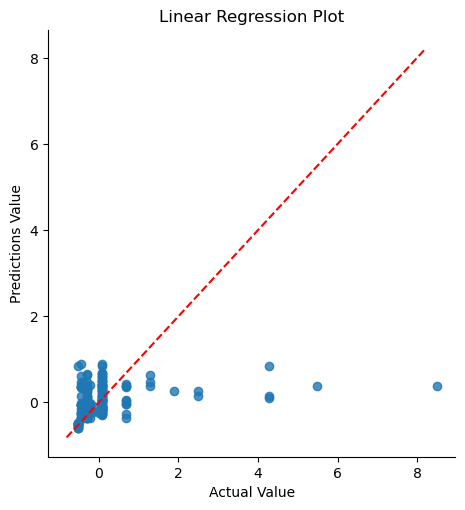

In [158]:
Linear_Regression(s3_model,X3_test,y3_test)

In [159]:
def homoscadecity_assumption(model,feature,label):
    df_results=calculate_residuals(model,feature,label)
    plt.figure(figsize=(7,5))
    plt.scatter(df_results.index,df_results.Residuals,alpha=0.5)
    plt.plot(np.repeat(0,df_results.index.max()),color="red",linestyle="dashed")
    plt.title("Residual Plot")
    plt.xlabel("Index Value")
    plt.ylabel("Residual Value")
    plt.show()

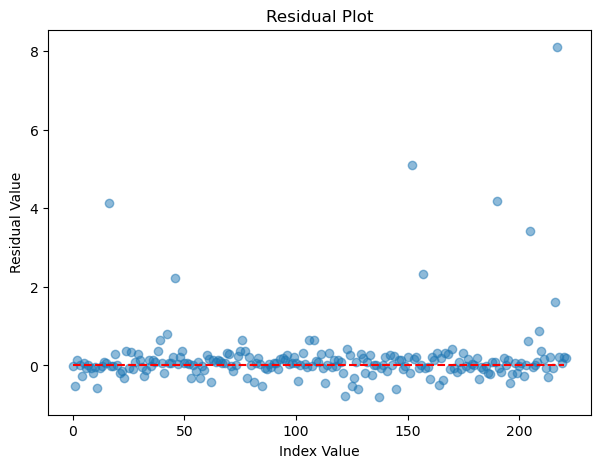

In [162]:
homoscadecity_assumption(s3_model,X3_test,y3_test)

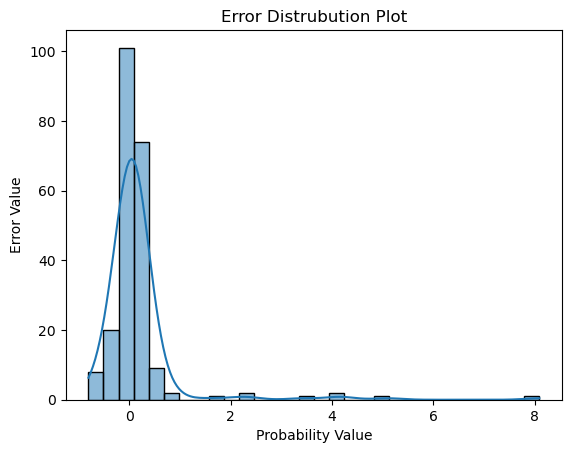

In [163]:
df_results=calculate_residuals(s3_model,X3_test,y3_test)
sns.histplot(df_results.Residuals,bins=30,label="Error  Distrubution",kde=True)
plt.title("Error Distrubution Plot")
plt.xlabel("Probability Value")
plt.ylabel("Error Value")
plt.show()

# PROJECT 2

# LOGISTIC REGRESSION

In [168]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Seasons_c,Age_c,Hit_target_c,Disciplinary failure_c,Education_c,son_c,Social_drinker_c,social_smoker_c,Pet_c,Absenteeism time in hours_c
0,11,26,7,3,1,289,36,13,33,239.554,...,Summer,30 TO 35,not reached,no disciplinary action,High school,NaN,social drinker,not a smoker,no pet,low_absent
1,36,0,7,3,1,118,13,18,50,239.554,...,Summer,45 TO 50,not reached,action take,High school,no son,social drinker,not a smoker,has pet,low_absent
2,3,23,7,4,1,179,51,18,38,239.554,...,Summer,35 TO 40,not reached,no disciplinary action,High school,has son,social drinker,not a smoker,has pet,low_absent
3,7,7,7,5,1,279,5,14,39,239.554,...,Summer,35 TO 40,not reached,no disciplinary action,High school,NaN,social drinker,smoker,has pet,low_absent
4,11,23,7,5,1,289,36,13,33,239.554,...,Summer,30 TO 35,not reached,no disciplinary action,High school,NaN,social drinker,not a smoker,no pet,low_absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,Summer,30 TO 35,reached,no disciplinary action,High school,NaN,social drinker,not a smoker,no pet,high_absent
736,1,11,7,3,1,235,11,14,37,264.604,...,Summer,35 TO 40,reached,no disciplinary action,Post Graduate,no son,not a drinker,not a smoker,no pet,low_absent
737,4,0,0,3,1,118,14,13,40,271.219,...,Summer,35 TO 40,reached,no disciplinary action,High school,no son,social drinker,not a smoker,NaN,low_absent
738,8,0,0,4,2,231,35,14,39,271.219,...,Winter,35 TO 40,reached,no disciplinary action,High school,NaN,social drinker,not a smoker,NaN,low_absent


In [170]:
df["Absenteeism time in hours_c"].value_counts()

Absenteeism time in hours_c
low_absent     468
high_absent    272
Name: count, dtype: int64

In [172]:
df["Absenteeism time in hours_c"]=df["Absenteeism time in hours_c"].replace(to_replace=["low_absent","high_absent"],value=[0,1])

In [174]:
logreg=df.loc[:,["Absenteeism time in hours_c"]]
logreg

,Absenteeism time in hours_c
0,0
1,0
2,0
3,0
4,0
...,...
735,1
736,0
737,0
738,0


In [176]:
df_scaled=df_scaled.drop(["Absenteeism time in hours"],axis=1)
df_scaled

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,-0.637161,0.804938,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932
1,1.632719,-2.280124,0.196763,-0.643947,-1.390175,-1.544379,-1.121694,1.242825,2.092860,-0.818212,0.638686,4.183300,-0.433857,-0.017234,0.872872,-0.280566,-0.566240,1.473056,0.975828,1.009438
2,-1.363523,0.448970,0.196763,0.059924,-1.390175,-0.632665,1.441240,1.242825,0.239405,-0.818212,0.638686,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.566240,0.774000,-0.350671,1.009438
3,-1.000342,-1.449530,0.196763,0.763796,-1.390175,0.861947,-1.661258,0.329981,0.393859,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,3.564226,-0.566240,-0.857131,-0.682295,-0.625100
4,-0.637161,0.448970,0.196763,0.763796,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,-0.637161,-0.618937,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.176427,-0.420423,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932
736,-1.545113,-0.974905,0.196763,-0.643947,-1.390175,0.204318,-1.256585,0.329981,0.084950,-0.176427,-0.420423,-0.239046,2.538869,-0.017234,-1.145644,-0.280566,0.192850,0.696327,-0.019046,0.542427
737,-1.272728,-2.280124,-1.841698,-0.643947,-1.390175,-1.544379,-1.054248,0.101770,0.548314,-0.006949,0.109131,-0.239046,-0.433857,-0.017234,0.872872,-0.280566,5.506478,1.473056,-0.350671,1.709954
738,-0.909547,-2.280124,-1.841698,0.059924,-0.490149,0.144533,0.362110,0.329981,0.393859,-0.006949,0.109131,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.951940,1.628402,-0.350671,1.943459


In [178]:
df_scaled=pd.concat([df_scaled,logreg],axis=1)
df_scaled

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours_c
0,-0.637161,0.804938,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,0
1,1.632719,-2.280124,0.196763,-0.643947,-1.390175,-1.544379,-1.121694,1.242825,2.092860,-0.818212,...,4.183300,-0.433857,-0.017234,0.872872,-0.280566,-0.566240,1.473056,0.975828,1.009438,0
2,-1.363523,0.448970,0.196763,0.059924,-1.390175,-0.632665,1.441240,1.242825,0.239405,-0.818212,...,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.566240,0.774000,-0.350671,1.009438,0
3,-1.000342,-1.449530,0.196763,0.763796,-1.390175,0.861947,-1.661258,0.329981,0.393859,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,3.564226,-0.566240,-0.857131,-0.682295,-0.625100,0
4,-0.637161,0.448970,0.196763,0.763796,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,-0.637161,-0.618937,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.176427,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,1
736,-1.545113,-0.974905,0.196763,-0.643947,-1.390175,0.204318,-1.256585,0.329981,0.084950,-0.176427,...,-0.239046,2.538869,-0.017234,-1.145644,-0.280566,0.192850,0.696327,-0.019046,0.542427,0
737,-1.272728,-2.280124,-1.841698,-0.643947,-1.390175,-1.544379,-1.054248,0.101770,0.548314,-0.006949,...,-0.239046,-0.433857,-0.017234,0.872872,-0.280566,5.506478,1.473056,-0.350671,1.709954,0
738,-0.909547,-2.280124,-1.841698,0.059924,-0.490149,0.144533,0.362110,0.329981,0.393859,-0.006949,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.951940,1.628402,-0.350671,1.943459,0


In [180]:
df_scaled=df_scaled.drop(["Weight"],axis=1)

In [182]:
df_scaled

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Height,Body mass index,Absenteeism time in hours_c
0,-0.637161,0.804938,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,-0.019046,0.775932,0
1,1.632719,-2.280124,0.196763,-0.643947,-1.390175,-1.544379,-1.121694,1.242825,2.092860,-0.818212,0.638686,4.183300,-0.433857,-0.017234,0.872872,-0.280566,-0.566240,0.975828,1.009438,0
2,-1.363523,0.448970,0.196763,0.059924,-1.390175,-0.632665,1.441240,1.242825,0.239405,-0.818212,0.638686,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.566240,-0.350671,1.009438,0
3,-1.000342,-1.449530,0.196763,0.763796,-1.390175,0.861947,-1.661258,0.329981,0.393859,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,3.564226,-0.566240,-0.682295,-0.625100,0
4,-0.637161,0.448970,0.196763,0.763796,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,-0.019046,0.775932,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,-0.637161,-0.618937,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.176427,-0.420423,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,-0.019046,0.775932,1
736,-1.545113,-0.974905,0.196763,-0.643947,-1.390175,0.204318,-1.256585,0.329981,0.084950,-0.176427,-0.420423,-0.239046,2.538869,-0.017234,-1.145644,-0.280566,0.192850,-0.019046,0.542427,0
737,-1.272728,-2.280124,-1.841698,-0.643947,-1.390175,-1.544379,-1.054248,0.101770,0.548314,-0.006949,0.109131,-0.239046,-0.433857,-0.017234,0.872872,-0.280566,5.506478,-0.350671,1.709954,0
738,-0.909547,-2.280124,-1.841698,0.059924,-0.490149,0.144533,0.362110,0.329981,0.393859,-0.006949,0.109131,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.951940,-0.350671,1.943459,0


In [184]:
print(df_scaled["Absenteeism time in hours_c"].unique())
print(df_scaled["Absenteeism time in hours_c"].value_counts())

[0 1]
Absenteeism time in hours_c
0    468
1    272
Name: count, dtype: int64


In [186]:
local_train,local_test=train_test_split(df_scaled,test_size=0.2,random_state=0)

In [188]:
X_train=np.array(local_train.drop(columns="Absenteeism time in hours_c",axis=1))
X_test=np.array(local_test.drop(columns="Absenteeism time in hours_c",axis=1))
y_train=np.array(local_train["Absenteeism time in hours_c"])
y_test=np.array(local_test["Absenteeism time in hours_c"])

In [190]:
s_model=LogisticRegression().fit(X_train,y_train)
s_model

LogisticRegression()

In [192]:
y_pred=s_model.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [194]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[76,  9],
       [21, 42]], dtype=int64)

In [196]:
from sklearn.metrics import confusion_matrix
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
print(tn,fp,fn,tp)

76 9 21 42


In [198]:
print("Recall_score:",recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))
print("Accuracy score:",accuracy_score(y_test,y_pred))
print("Precision_score:",precision_score(y_test,y_pred))

Recall_score: 0.6666666666666666
f1_score: 0.7368421052631579
Accuracy score: 0.7972972972972973
Precision_score: 0.8235294117647058


In [202]:
roc_score=roc_auc_score(y_test,s_model.predict_proba(X_test)[:,1])
roc_score

0.8534080298786181

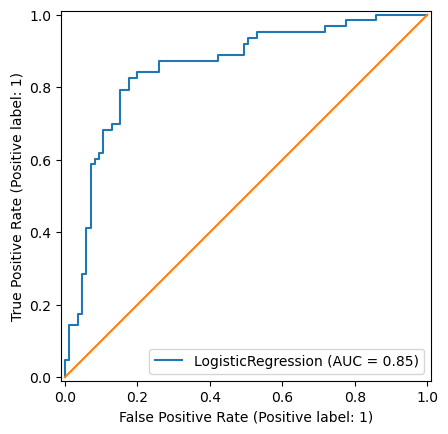

In [204]:
RocCurveDisplay.from_estimator(s_model,X_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

# KNN NEIGHBORS

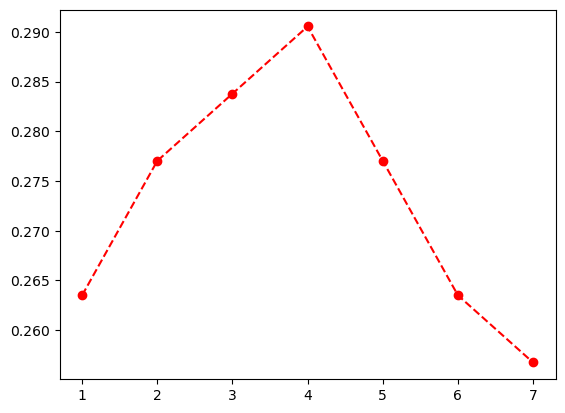

In [207]:
error_rate=[]
for  i in range(1,8):
    cls_food=neighbors.KNeighborsClassifier(n_neighbors=i)
    cls_food.fit(X_train,y_train)
    predictions=cls_food.predict(X_test)
    error_rate.append(np.mean(predictions!=y_test))
plt.plot(range(1,8),error_rate,color="red",marker="o",linestyle="dashed")
plt.show()

In [208]:
import math as m
round(m.sqrt(len(X_test)))

12

In [209]:
from sklearn  import neighbors
clf_food=neighbors.KNeighborsClassifier(n_neighbors=7)
clf_food.fit(X_train,y_train)
pred_local=clf_food.predict(X_test)
pred_local

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [210]:
Recall_score2=recall_score(y_test,pred_local)
print("Recall score:",Recall_score2)
F1_score2=f1_score(y_test,pred_local)
print("F1 score:",F1_score2)
Precision_score2=precision_score(y_test,pred_local)
print("Precision_score:",Precision_score2)
Accuracy_score2=accuracy_score(y_test,pred_local)
print("Accuracy score:",Accuracy_score2)

Recall score: 0.5238095238095238
F1 score: 0.6346153846153846
Precision_score: 0.8048780487804879
Accuracy score: 0.7432432432432432


# KNN CLUSTERING

In [216]:
required_data=df_scaled.loc[:,["Reason for absence","Absenteeism time in hours_c"]]
required_data

,Reason for absence,Absenteeism time in hours_c
0,0.804938,0
1,-2.280124,0
2,0.448970,0
3,-1.449530,0
4,0.448970,0
...,...,...
735,-0.618937,1
736,-0.974905,0
737,-2.280124,0
738,-2.280124,0


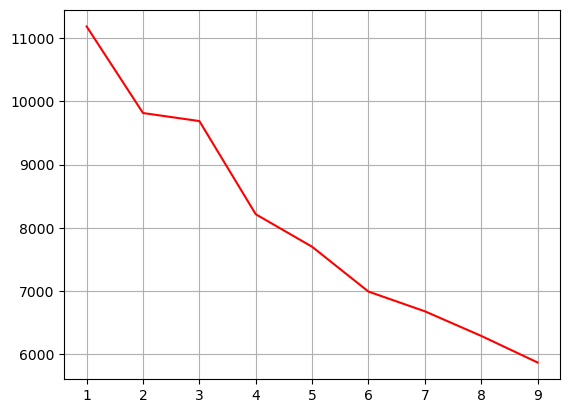

In [218]:
from sklearn.cluster import KMeans
Distorsions=[]
for i in range(1,10):
    KMeans_model=KMeans(n_clusters=i)
    KMeans_model.fit(X_train,y_train)
    Distorsions.append(KMeans_model.inertia_)
plt.plot(range(1,10),Distorsions,color="red")
plt.grid(True)
plt.show()

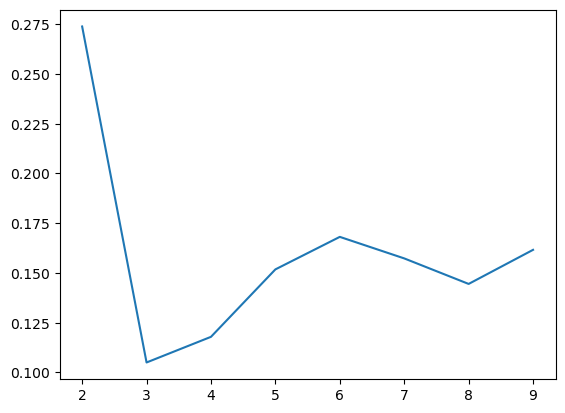

In [219]:
from sklearn.metrics import silhouette_score
sil_score=[]
for i in range(2,10):
    sil_score.append(silhouette_score(X_test,KMeans(n_clusters=i,random_state=10).fit_predict(X_test)))
plt.plot(range(2,10),sil_score)
plt.show()

In [220]:
KMean_model=KMeans(n_clusters=2)
KMean_model.fit(df_scaled)

KMeans(n_clusters=2)

In [222]:
KMean_centroid=KMean_model.cluster_centers_
KMean_centroid

array([[-0.47985784,  0.05344876, -0.10882671, -0.05304284, -0.07532246,
        -0.56390099,  0.27190501,  1.02212691,  0.68878499, -0.01198278,
        -0.00636838,  0.01573964, -0.43385741, -0.42210414,  0.76488514,
        -0.24892149, -0.47252514,  0.33714339,  0.69617523,  0.33744856],
       [ 0.23461862, -0.0261329 ,  0.05320904,  0.02593443,  0.03682768,
         0.27571014, -0.1329435 , -0.49975219, -0.33677013,  0.00585878,
         0.00311371, -0.00769564,  0.21212747,  0.2063809 , -0.37397804,
         0.12170608,  0.23103342, -0.16484073, -0.34038346,  0.38229376]])

In [223]:
labels=KMean_model.labels_
labels

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,

In [224]:
from sklearn.metrics import calinski_harabasz_score

In [225]:
calinski_harabasz_score=calinski_harabasz_score(df_scaled,labels)
calinski_harabasz_score

83.56279828476828

In [228]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score=davies_bouldin_score(df_scaled,labels)
davies_bouldin_score

2.6689774748292168

In [234]:
required_data1=np.array(required_data)

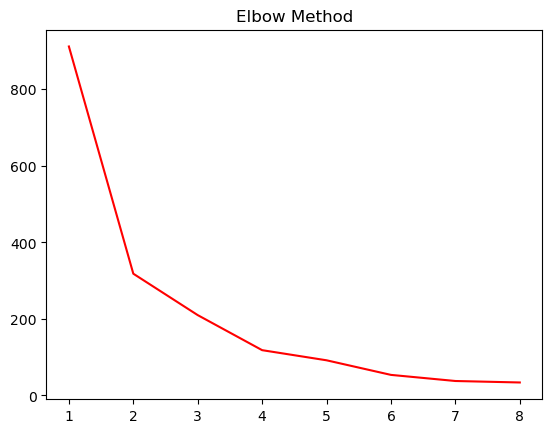

In [236]:
Distortions=[]
for i in range(1,9):
    KMeans_models=KMeans(n_clusters=i)
    KMeans_models.fit(required_data)
    Distortions.append(KMeans_models.inertia_)
plt.plot(range(1,9),Distortions,color="red")
plt.title("Elbow Method")
plt.show()

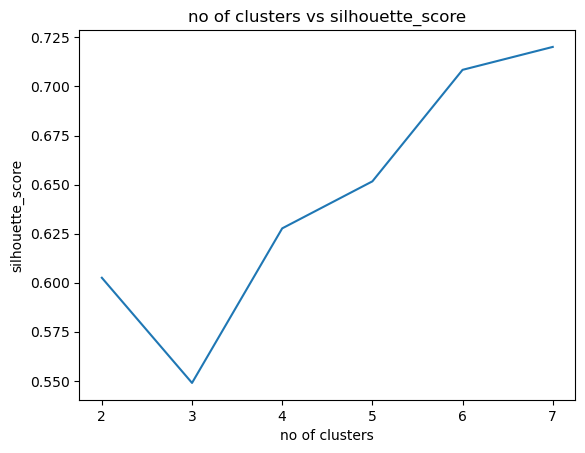

In [237]:
n_clusters_range=range(2,8)
silhouette_score_s=[]
for n_clusters in n_clusters_range:
    #train model and get silhouette_score
    silhouette_score_s.append(silhouette_score(required_data,KMeans(n_clusters=n_clusters,random_state=10).fit_predict(required_data)))
plt.plot(n_clusters_range, silhouette_score_s)
plt.xlabel("no of clusters")
plt.ylabel("silhouette_score")
plt.title("no of clusters vs silhouette_score")
plt.show()

In [239]:
KMean_model3=KMeans(n_clusters=2)
KMean_model3.fit(required_data)

KMeans(n_clusters=2)

In [240]:
KMean_centroid=KMean_model3.cluster_centers_
print(KMean_centroid)

[[ 0.60326965  0.2826087 ]
 [-1.30450616  0.55128205]]


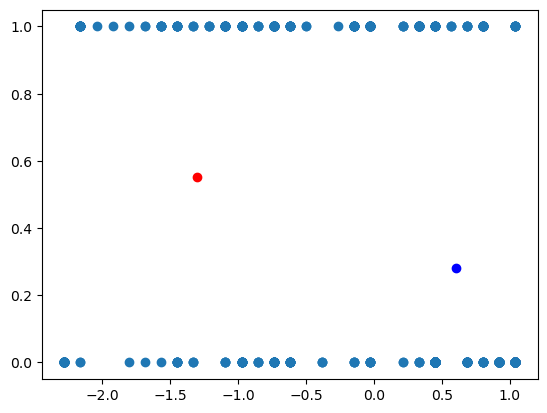

In [244]:
plt.scatter(required_data1[:,0],required_data1[:,1])
plt.scatter(0.60326965,0.2826087,color="blue")
plt.scatter(-1.30450616 ,0.55128205,color="red")
plt.show()

In [246]:
labels4=KMean_model3.labels_
labels4

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,

In [248]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score=calinski_harabasz_score(required_data,labels4)
calinski_harabasz_score

1377.8164174955282

In [250]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score=davies_bouldin_score(required_data,labels)
davies_bouldin_score

22.252985090326934